In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot

In [2]:
import plotly.graph_objects as go
import plotly.express as px
df = pd.read_csv("pedestrian.csv")
print(df.shape)
df.columns[20:]

(8760, 115)


Index(['College Green/Church Lane IN', 'College Green/Church Lane OUT',
       'College st/Westmoreland st', 'College st/Westmoreland st IN',
       'College st/Westmoreland st OUT', 'D'olier st/Burgh Quay',
       'D'olier st/Burgh Quay IN', 'D'olier st/Burgh Quay OUT',
       'Dame Street/Londis', 'Dame Street/Londis Pedestrian IN',
       'Dame Street/Londis Pedestrian OUT', 'Dawson Street',
       'Dawson Street IN', 'Dawson Street OUT', 'Dawson Street old',
       'Dawson Street old IN', 'Dawson Street old OUT',
       'Dawson Street/Molesworth Pedestrian', 'Dawson Street/Molesworth IN',
       'Dawson Street/Molesworth OUT', 'Grafton st/Monsoon',
       'Grafton st/Monsoon Pedestrian IN', 'Grafton st/Monsoon Pedestrian OUT',
       'Grafton Street / Nassau Street / Suffolk Street',
       'Grafton Street / Nassau Street / Suffolk Street IN',
       'Grafton Street / Nassau Street / Suffolk Street OUT',
       'Grafton Street/CompuB', 'Grafton Street/CompuB IN',
       'Grafton St

In [3]:
data=df.filter(['Richmond_in','Time'])

In [4]:
data.set_index(data['Time'],inplace=True)

In [5]:
data.drop('Time',axis=1,inplace=True)

In [6]:
data=data[:4000]

In [7]:
data

,Richmond_in
Time,
01-01-2023 00:00,311.0
01-01-2023 01:00,90.0
01-01-2023 02:00,271.0
01-01-2023 03:00,270.0
01-01-2023 04:00,227.0
...,...
16-06-2023 11:00,815.0
16-06-2023 12:00,1342.0
16-06-2023 13:00,1064.0


In [30]:
len(data)

4000

In [8]:
train_size = int(0.66 * len(data))
test_size = len(data) - train_size

In [9]:
train = data.iloc[:test_size]
test = data.iloc[test_size:]

In [10]:
train.dropna(inplace=True)
test.dropna(inplace=True) 

C:\Users\tanis\AppData\Local\Temp\ipykernel_16468\601465311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(inplace=True)
C:\Users\tanis\AppData\Local\Temp\ipykernel_16468\601465311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.dropna(inplace=True)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [38]:
scaled_test

array([[0.405547  ],
       [0.81879815],
       [0.57041602],
       ...,
       [0.32788906],
       [0.40862866],
       [0.33713405]])

In [12]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [39]:
length = 24
n_features=1
time_series_generator = TimeseriesGenerator(scaled_train,scaled_train,length=length, batch_size=2)

In [40]:
X,y=time_series_generator[0]

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers
import tensorflow as tf



initializer = tf.keras.initializers.he_uniform(seed=0)

model = Sequential()


model.add(LSTM(96, activation='relu',kernel_initializer=initializer,return_sequences=True,
                     bias_initializer=initializers.Constant(0.01)))
model.add(LSTM(48, activation='relu', input_shape=(length, n_features),kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
model.add(Dense(1,activation='linear',kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))

#opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    #beta_1=0.9,
    #beta_2=0.999,
    #epsilon=1e-8)

model.compile(optimizer='adam', loss='mse')


time_series_val_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)


from tensorflow.keras.callbacks import EarlyStopping
Early_Stopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

model.fit(time_series_generator,epochs=100,
                    validation_data=time_series_val_generator ,
                   callbacks=[Early_Stopping])

Epoch 1/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.0580 - val_loss: 0.0153
Epoch 2/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0221 - val_loss: 0.0134
Epoch 3/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0185 - val_loss: 0.0122
Epoch 4/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0171 - val_loss: 0.0114
Epoch 5/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.0177 - val_loss: 0.0116
Epoch 6/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0161 - val_loss: 0.0148
Epoch 7/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0168 - val_loss: 0.0175
Epoch 8/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0155 - val_loss: 0.0103
Epoch 9/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0167 - val_loss: 0.0090
Epoch 10/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0150 - val_loss: 0.0105
Epoch 11/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0158 - val_loss: 0.0100
Epoch 12/100
668/66

In [32]:
actual_train=scaled_train[length:]
actual_train=scaler.inverse_transform(actual_train)

In [ ]:
import numpy as np
test_outputs = []
batch = scaled_train[-length:].reshape((1, length, n_features))

for i in range(len(test)):
    test_out = model.predict(batch)[0]
    test_outputs.append(test_out)
    batch = np.append(batch[:,1:,:],[[test_out]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

In [34]:
lstm_predictions = scaler.inverse_transform(test_outputs)
test['LSTM Predictions'] = lstm_predictions

C:\Users\tanis\AppData\Local\Temp\ipykernel_16468\4107437138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = lstm_predictions


In [35]:
test

,Richmond_in,LSTM Predictions
Time,,
26-02-2023 16:00,1316.0,1379.594075
26-02-2023 17:00,2657.0,1383.479244
26-02-2023 18:00,1851.0,1399.053960
26-02-2023 19:00,1326.0,1416.803071
26-02-2023 20:00,1344.0,1414.478005
...,...,...
16-06-2023 11:00,815.0,1423.970044
16-06-2023 12:00,1342.0,1423.970044
16-06-2023 13:00,1064.0,1423.970044


In [36]:
actual=test['Richmond_in']
predicted=test['LSTM Predictions']

Test MSE: 808398.070


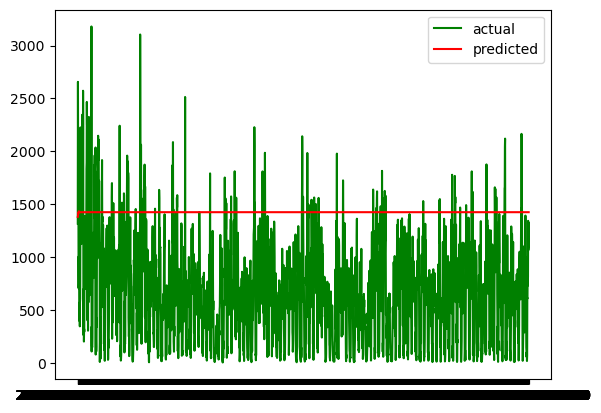

In [37]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(actual, predicted)
print('Test MSE: %.3f' % error)
pyplot.plot(actual, color='green',label='actual')
pyplot.plot(predicted, color='red',label='predicted')
pyplot.legend(loc="upper right")
pyplot.show()